## Задание

Дан массив данных
```
X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])
```
Требуется провести кластерный анализ данных методом k-средних. Поэкспериментируйте с количеством кластеров.


Number of clusters: 2, Silhouette score: 0.66
Number of clusters: 3, Silhouette score: 0.58
Number of clusters: 4, Silhouette score: 0.43
Number of clusters: 5, Silhouette score: 0.34


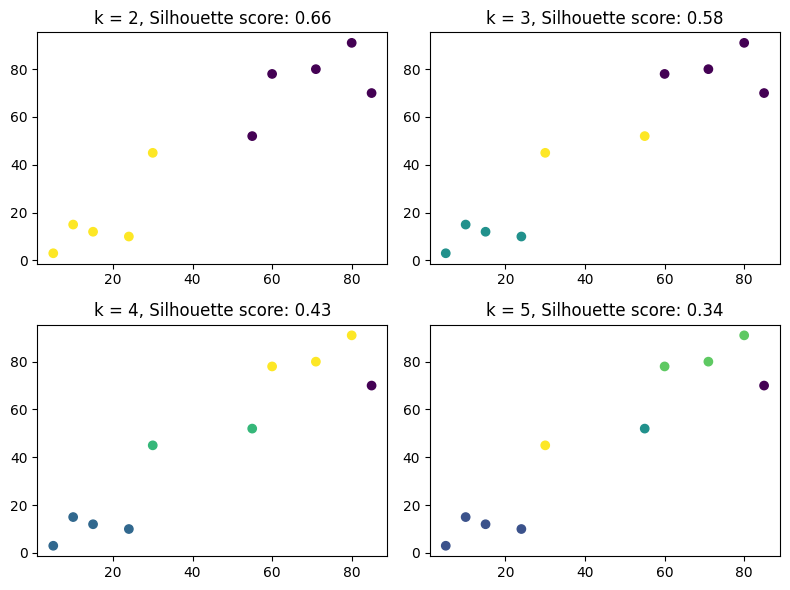

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

# Список для хранения silhouette scores
scores = []

# Цикл для проверки разного количества кластеров
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    y_pred = kmeans.labels_  # Используем labels_ вместо повторного predict
    score = silhouette_score(X, y_pred)
    scores.append(score) # Добавляем score в список
    print(f"Number of clusters: {k}, Silhouette score: {score:.2f}")

# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(8, 6)) # Создаем сетку подграфиков 2x2
axes = axes.flatten() # Преобразуем axes в одномерный массив

for i, k in enumerate(range(2, 6)):
    # Используем уже обученную модель и предсказанные метки
    y_pred = KMeans(n_clusters=k, random_state=0).fit_predict(X)
    axes[i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
    axes[i].set_title(f"k = {k}, Silhouette score: {scores[i]:.2f}") # Используем сохраненный score

plt.tight_layout()
plt.show()

## Задание

Выполните кластеризацию для набора данных ирисов Фишера. Выполните предсказания для модели. Поэкспериментируйте с количеством кластеров.

Количество кластеров: 2, Silhouette score: 0.68


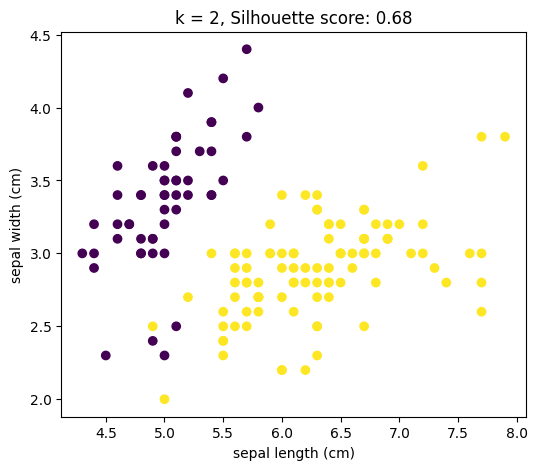

Количество кластеров: 3, Silhouette score: 0.55


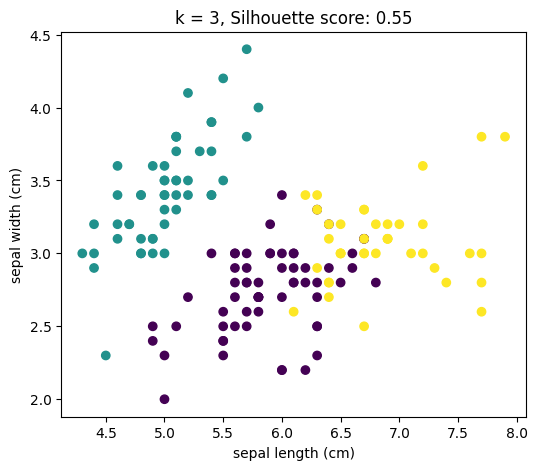

Количество кластеров: 4, Silhouette score: 0.50


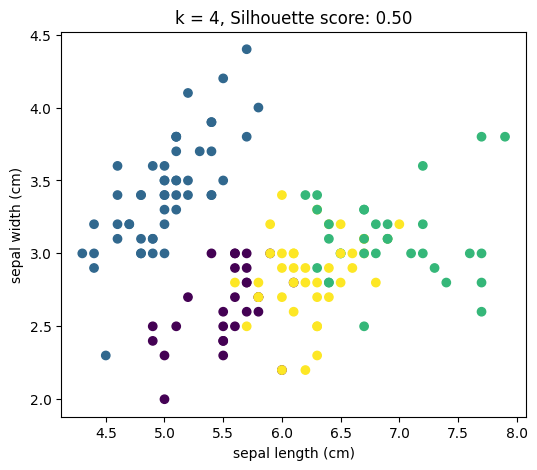

Количество кластеров: 5, Silhouette score: 0.46


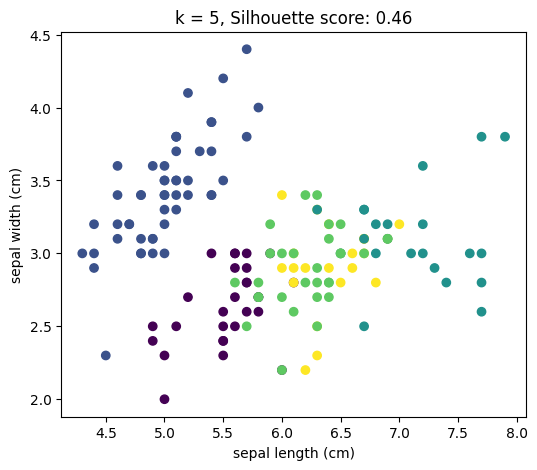

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Загрузка набора данных Iris
iris = sklearn.datasets.load_iris()
X = iris.data

# Цикл для разного количества кластеров k
for k in range(2, 6):
    # Создание и обучение модели KMeans
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_pred = kmeans.fit_predict(X)

    # Вычисление Silhouette score
    score = silhouette_score(X, y_pred)
    print(f"Количество кластеров: {k}, Silhouette score: {score:.2f}")

    # Визуализация результатов
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
    plt.title(f"k = {k}, Silhouette score: {score:.2f}")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

## Задание

Выполните иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака (всего их четыре).

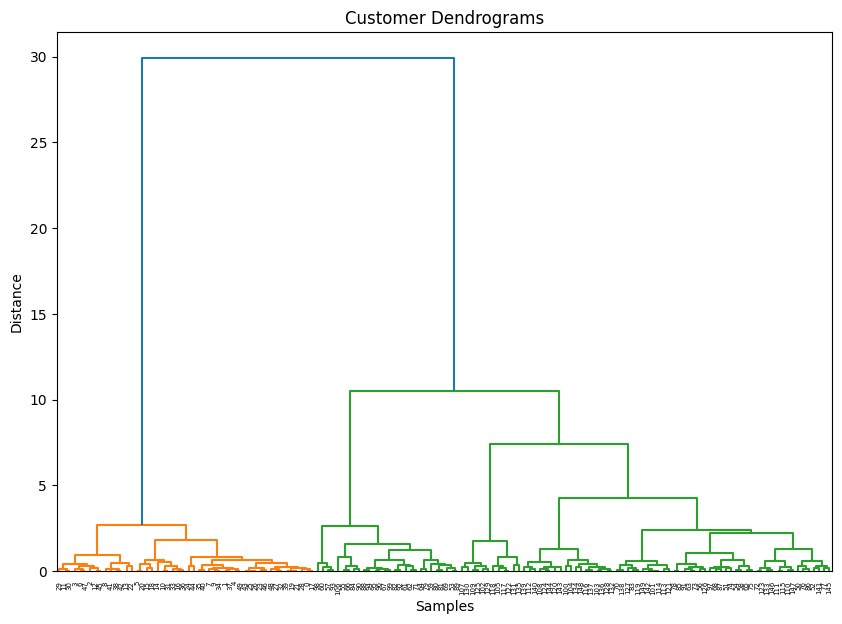

In [ ]:
import matplotlib.pyplot as plt  # Импорт библиотеки для построения графиков
import pandas as pd  # Импорт библиотеки для работы с DataFrame
import numpy as np  # Импорт библиотеки для работы с массивами
import scipy.cluster.hierarchy as shc # Импорт библиотеки для иерархической кластеризации
from sklearn.cluster import AgglomerativeClustering # Импорт класса для агломеративной кластеризации (не используется в этом коде)
from sklearn.datasets import load_iris  # Функция для загрузки набора данных iris
from scipy.cluster.hierarchy import linkage # Функция для построения связей между кластерами


# Загрузка набора данных Iris
iris = load_iris()

# Создание DataFrame из данных Iris. np.c_ объединяет данные и метки в один массив.
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Выбор двух признаков для кластеризации
X = df[['sepal length (cm)', 'petal length (cm)']]

# Построение связей между кластерами с использованием метода Ward
Z = linkage(X, 'ward') # 'ward' минимизирует внутрикластерную дисперсию

# Построение дендрограммы
plt.figure(figsize=(10, 7))  # Создание фигуры размером 10x7 дюймов
plt.title('Дендрограмма для Iris dataset') # Заголовок графика
plt.xlabel('Образцы') # Название оси X
plt.ylabel('Расстояние') # Название оси Y
dend = shc.dendrogram(Z) # Построение дендрограммы, используя предварительно вычисленные связи Z


plt.show() # Отображение графика

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


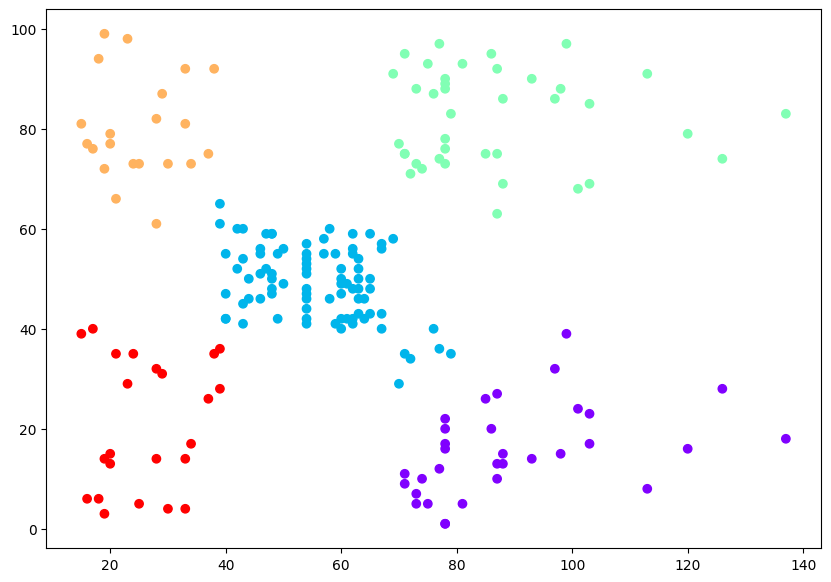

In [ ]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data)
plt.figure(figsize = (10, 7))
plt.scatter(data[:, 0], data[:, 1], c = cluster.labels_, cmap = 'rainbow')

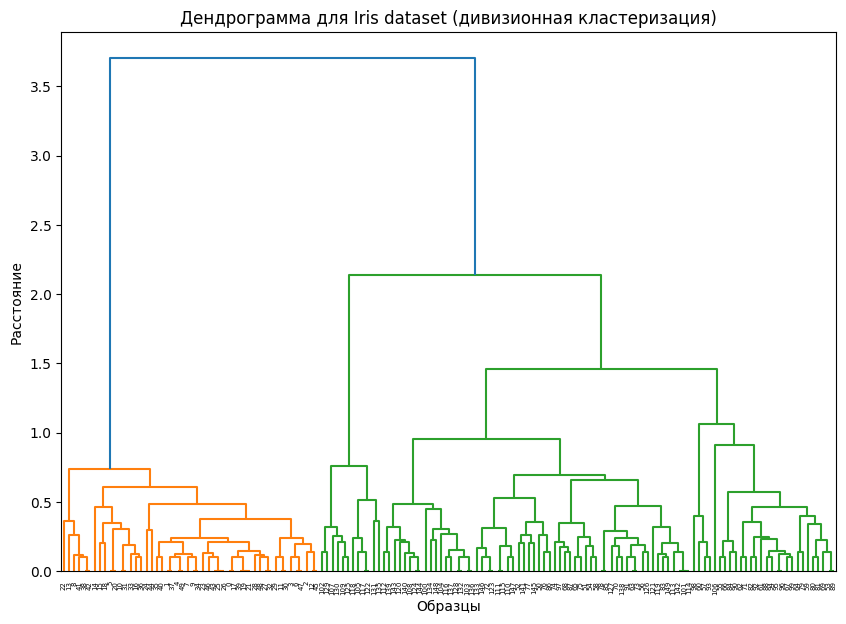

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage

# Загрузка набора данных Iris
iris = load_iris()

# Создание DataFrame из данных Iris
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Выбор двух признаков для кластеризации
X = df[['sepal length (cm)', 'petal length (cm)']]

# Построение связей между кластерами, 'ward' (по умолчанию)  ИЛИ  'average' для дивизионной кластеризации
Z = linkage(X, 'average')

# Построение дендрограммы
plt.figure(figsize=(10, 7))
plt.title('Дендрограмма для Iris dataset (дивизионная кластеризация)') # Изменено название для ясности
plt.xlabel('Образцы')
plt.ylabel('Расстояние')
dend = shc.dendrogram(Z, )

plt.show()